## Regression - Excercise 01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Load the data

In [2]:
path = "D:\\Sandbox\\Github\\DATA\\moore.csv"
df = pd.read_csv(path, header=None, names =('year','price'))
df.head()

,year,price
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


### Explore the data

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,162.0,2.002198e+03,1.368993e+01,1971.0,1991.25,2006.5,2.014000e+03,2.018000e+03
price,162.0,2.103686e+09,3.604377e+09,2300.0,925000.00,326500000.0,2.997500e+09,2.360000e+10


<AxesSubplot:xlabel='year', ylabel='price'>

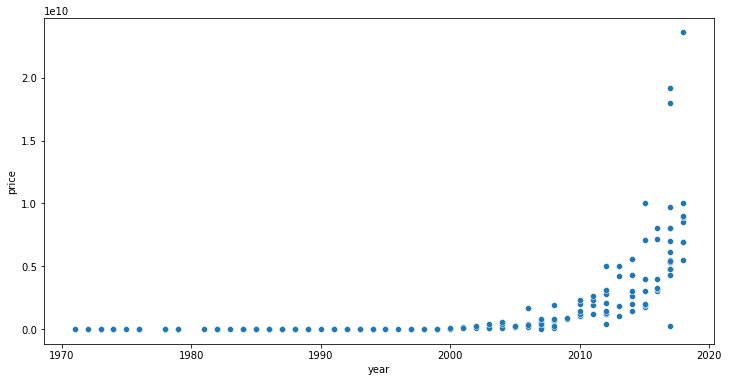

In [4]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='year',y='price',data=df)

### Train test and scale data

In [5]:
X = df.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

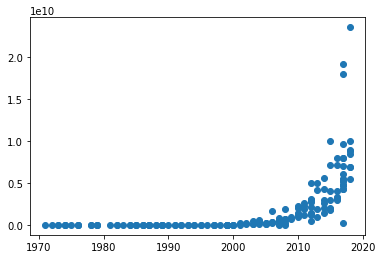

In [6]:
plt.scatter(X, y)

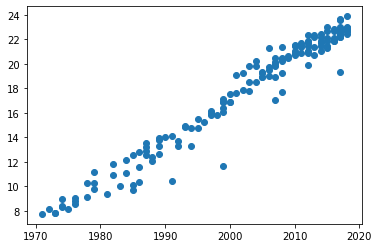

In [7]:
plt.scatter(X, np.log(y))

#### Max Min scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(129, 1)
(33, 1)


### Model # 1

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [10]:
model = Sequential()

model.add(Input(shape=(1,)))  
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Train the model

history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=200, verbose=0)

<AxesSubplot:>

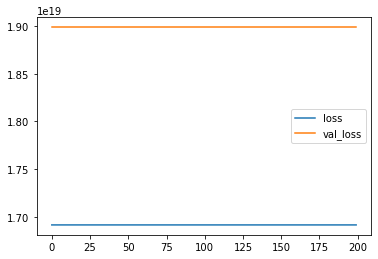

In [12]:
# Plot the loss
losses = pd.DataFrame(model.history.history)
losses.plot()

### Model # 2

In [13]:
model = Sequential()

model.add(Input(shape=(1,)))  
model.add(Dense(1))

model.compile(optimizer='sgd',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=200, verbose=0)

<AxesSubplot:>

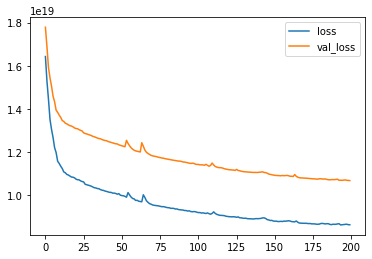

In [15]:
# Plot the loss
losses = pd.DataFrame(model.history.history)
losses.plot()

### Model # 3

In [16]:
model = Sequential()

model.add(Input(shape=(1,)))  
model.add(Dense(1))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
# learning rate scheduler
def custom_schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 
custom_scheduler = tf.keras.callbacks.LearningRateScheduler(custom_schedule)

In [18]:
# Train the model

history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=200, verbose=0,
          callbacks=[custom_scheduler])

<AxesSubplot:>

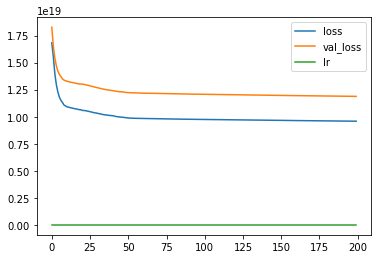

In [19]:
# Plot the losses
losses = pd.DataFrame(model.history.history)
losses.plot()

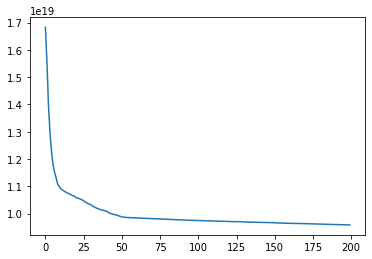

In [20]:
# Plot only the loss
plt.plot(history.history['loss'], label='loss')

### Evaluate and Predict

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [22]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers[0].get_weights())

[array([[3.0591767e+09]], dtype=float32), array([2.2672338e+08], dtype=float32)]


In [23]:
# The slope of the line is:
m = model.layers[0].get_weights()[0][0,0]
print(m)

3059176700.0


In [24]:
y_prediction = model.predict(X_test).flatten()

In [25]:
df['price'].mean()

2103686087.1728394

In [26]:
df['price'].median()

326500000.0

In [27]:
mean_absolute_error(y_test, y_prediction)

2257328760.3636365

In [28]:
np.sqrt(mean_squared_error(y_test, y_prediction))

3446743051.134609

In [29]:
explained_variance_score(y_test, y_prediction)

0.2034175031583415

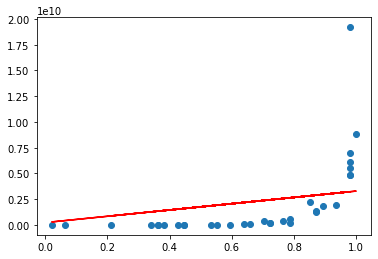

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_prediction, 'r')  # prediction with a regression line

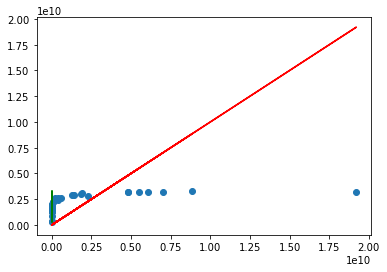

In [34]:
# Our predictions
plt.scatter(y_test,y_prediction)

# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.plot(X_test, y_prediction, 'green') 